In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [61]:
data = pd.read_csv('AirQualityUCI.csv')
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [62]:
#data = data.iloc[:,[4,13]]
#data.head()

,NMHC(GT),RH
0,150.0,48.9
1,112.0,47.7
2,88.0,54.0
3,80.0,60.0
4,51.0,59.6


In [52]:
data = data.drop(["PT08.S5(O3)","PT08.S4(NO2)","NO2(GT)","PT08.S3(NOx)","NOx(GT)","Date","Time","CO(GT)","PT08.S1(CO)","C6H6(GT)", "PT08.S2(NMHC)","Unnamed: 15","Unnamed: 16","AH","T"], axis=1)
data.head()

,NMHC(GT),RH
0,150.0,48.9
1,112.0,47.7
2,88.0,54.0
3,80.0,60.0
4,51.0,59.6


Text(0, 0.5, 'RH')

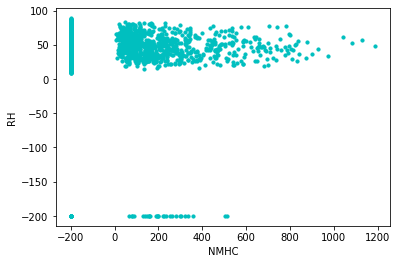

In [53]:
data.columns = ["NMHC", "RH"]
data = data.dropna()

plt.scatter(data.NMHC, data.RH, s=10, c="c", marker='o', alpha=1)
plt.xlabel('NMHC')
plt.ylabel('RH')


In [28]:
data_x = data.iloc[:,0:2]
data_x.head()

,NMHC,RH
0,150.0,48.9
1,112.0,47.7
2,88.0,54.0
3,80.0,60.0
4,51.0,59.6


In [30]:
x_array = np.array(data_x)
print(x_array)

[[ 150.    48.9]
 [ 112.    47.7]
 [  88.    54. ]
 ...
 [-200.    18.3]
 [-200.    13.5]
 [-200.    13.1]]


In [32]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.25197984, 0.86214063],
       [0.22462203, 0.85798407],
       [0.20734341, 0.87980603],
       ...,
       [0.        , 0.75614825],
       [0.        , 0.739522  ],
       [0.        , 0.73813647]])

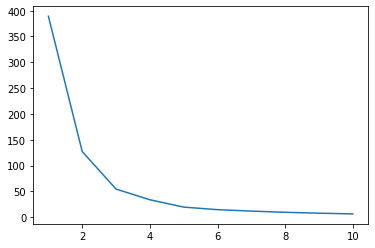

In [33]:
#metode elbow mencari cluster yang baik
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)

In [42]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(x_scaled)

print(kmeans.cluster_centers_)

[[-1.08940634e-15  8.11301740e-01]
 [ 2.25995035e-02 -9.99200722e-16]
 [ 5.53619531e-01  8.50355916e-01]
 [-1.23165367e-15  9.12396576e-01]
 [ 2.38045047e-01  8.69137122e-01]]


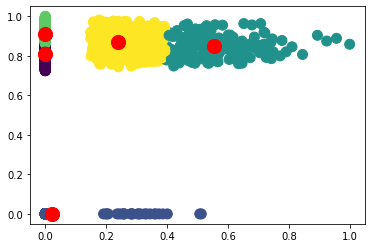

In [47]:
data["kluster"] = kmeans.labels_

output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=100, c=data.kluster, marker='o', alpha=1, )
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker='o')